In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [8]:

data = pd.read_csv('titanic.csv')

X = data[['Age', 'Fare']].fillna(data[['Age', 'Fare']].median())
y = data['Survived'].values


In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
class SingleNeuron:
    def __init__(self, input_dim):
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn()
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def binary_cross_entropy(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
    
    def train(self, X, y, lr=0.01, epochs=100):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            loss = self.binary_cross_entropy(y, y_pred)
            losses.append(loss)
            
            # Backward pass
            error = y_pred - y
            grad_weights = np.dot(X.T, error) / len(y)
            grad_bias = np.mean(error)
            
            # Update parameters
            self.weights -= lr * grad_weights
            self.bias -= lr * grad_bias
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

In [11]:
neuron = SingleNeuron(input_dim=X_train.shape[1])
losses = neuron.train(X_train, y_train, lr=0.1, epochs=100)

Epoch 0, Loss: 1.3355
Epoch 10, Loss: 1.1956
Epoch 20, Loss: 1.0843
Epoch 30, Loss: 0.9956
Epoch 40, Loss: 0.9248
Epoch 50, Loss: 0.8684
Epoch 60, Loss: 0.8235
Epoch 70, Loss: 0.7879
Epoch 80, Loss: 0.7594
Epoch 90, Loss: 0.7365


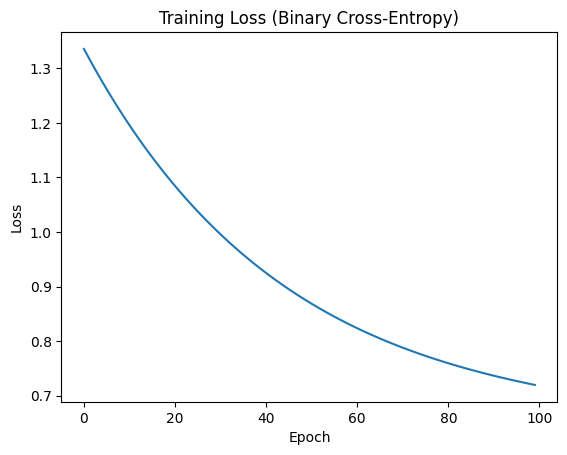

In [12]:
plt.plot(losses)
plt.title("Training Loss (Binary Cross-Entropy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [13]:
train_preds = (neuron.forward(X_train) > 0.5).astype(int)
test_preds = (neuron.forward(X_test) > 0.5).astype(int)


In [14]:
print(f"Train Accuracy: {accuracy_score(y_train, train_preds):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")


Train Accuracy: 0.6527
Test Accuracy: 0.6190


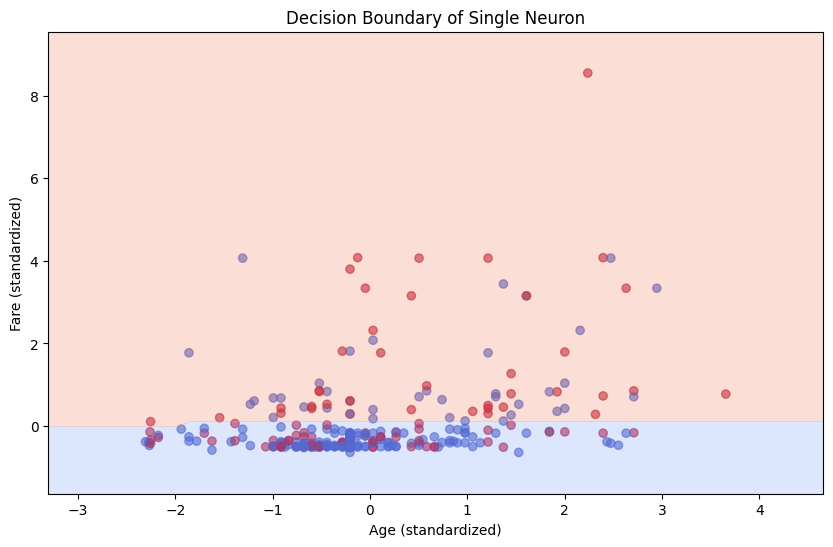

In [ ]:
if X_train.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
    
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = neuron.forward(np.c_[xx.ravel(), yy.ravel()]) > 0.5
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.title("Decision Boundary of Single Neuron")
    plt.xlabel("Age (standardized)")
    plt.ylabel("Fare (standardized)")
    plt.show()

In [16]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0)

_, nn_test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nNeural Network Test Accuracy: {nn_test_acc:.4f}")



c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Neural Network Test Accuracy: 0.6190
